In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")
#sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

#import forces as fc
import molecules as mc
import img3dto2d as i32
import util
#import random
#import copy
#from tqdm import tqdm

#mayavi imports:
#from __future__ import absolute_import, division, print_function
#from mayavi import mlab
#import math

#video imports
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\videoStuff")
import video_format as vf
from skimage.transform import resize, rescale
from skimage.morphology import label

from skimage.color import label2rgb

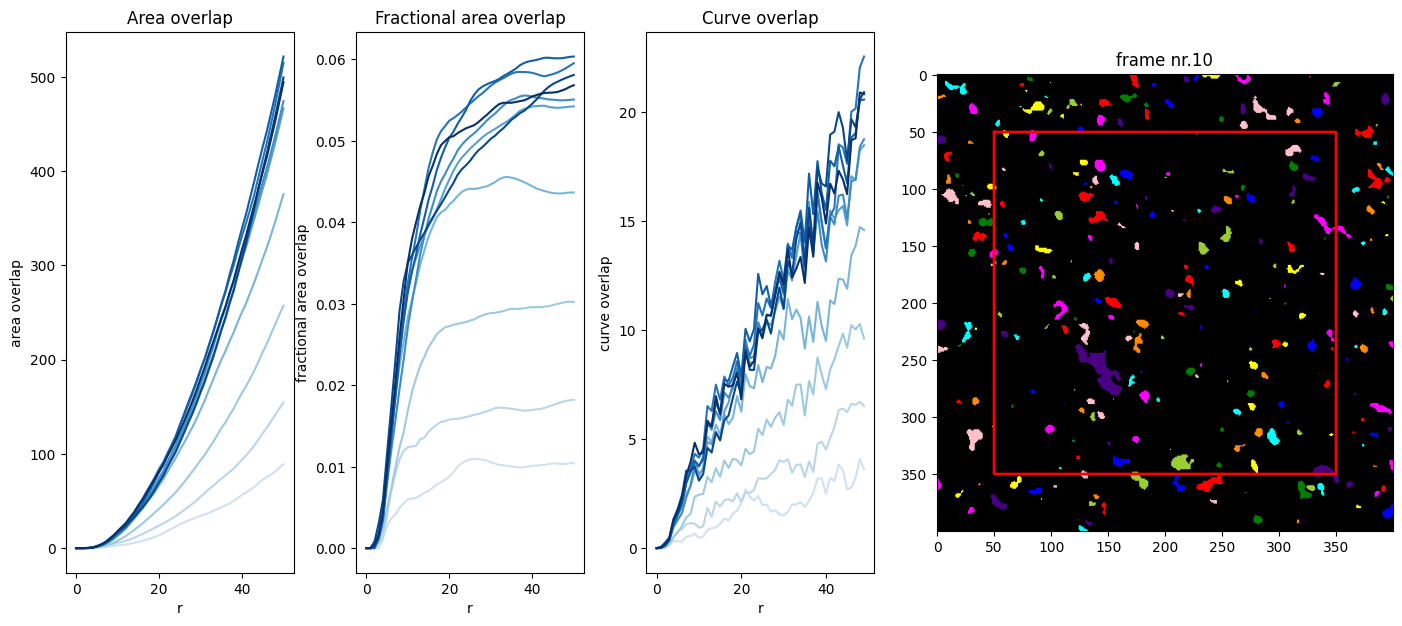

In [26]:
threshold2 = 0.3
smooth = 1
skip_size = 24
L= 50
size = 400#400

start_offset = 1


frames_240= vf.process_video(vf.VIDEO_PATH,threshold=threshold2,smooth=smooth,skip_size=skip_size,size=size)
used_frame = frames_240#[start_offset:7]

F_list2, G_list2 = vf.analyse_video(used_frame,L=L)

#frames_240= vf.process_video(vf.VIDEO_PATH,threshold=threshold,smooth=smooth,skip_size=skip_size,size=size)
print(len(frames_240))

vf.visualize(used_frame,F_list2,G_list2,L=L)


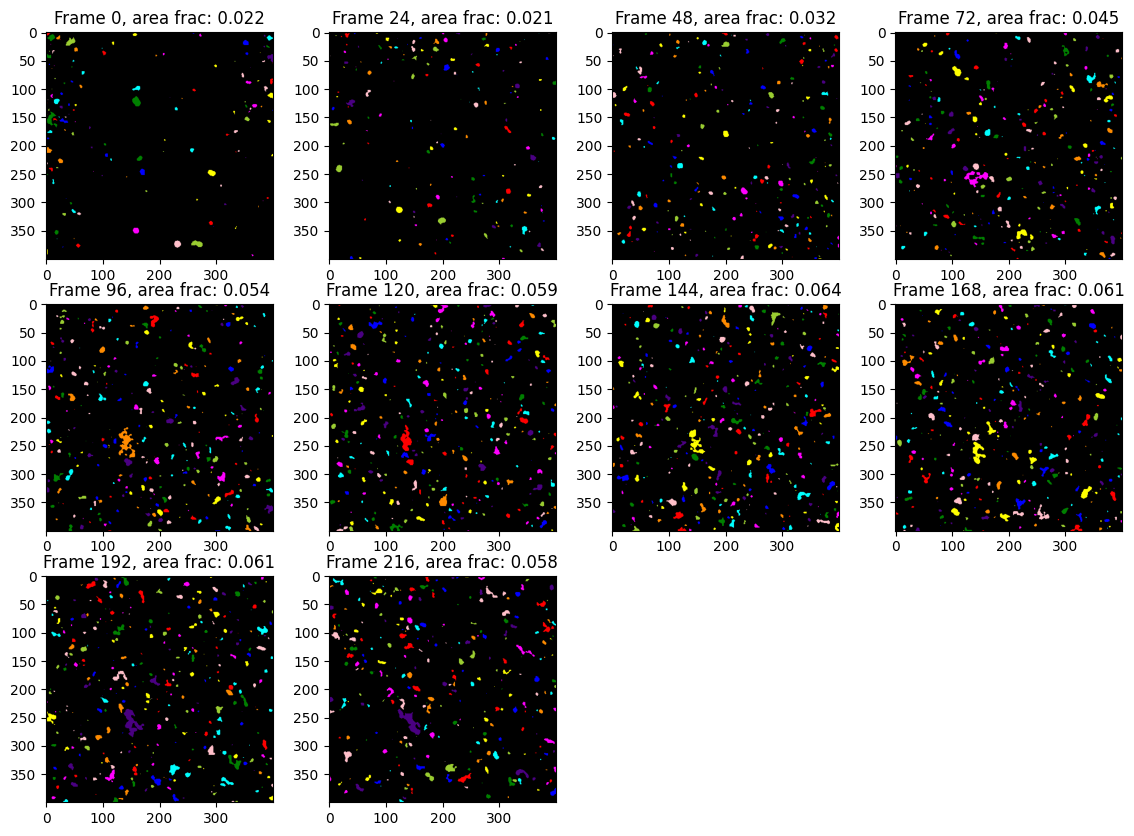

In [27]:
plt.figure(figsize=(14,10))
for i, img in enumerate(used_frame):
  plt.subplot(3,4,i+1)
  plt.title(f"Frame {(i)*skip_size*start_offset}, area frac: {np.sum(np.where(img >0,1,0))/(size*size):.3f}")
  plt.imshow(label2rgb(img, bg_label=0))

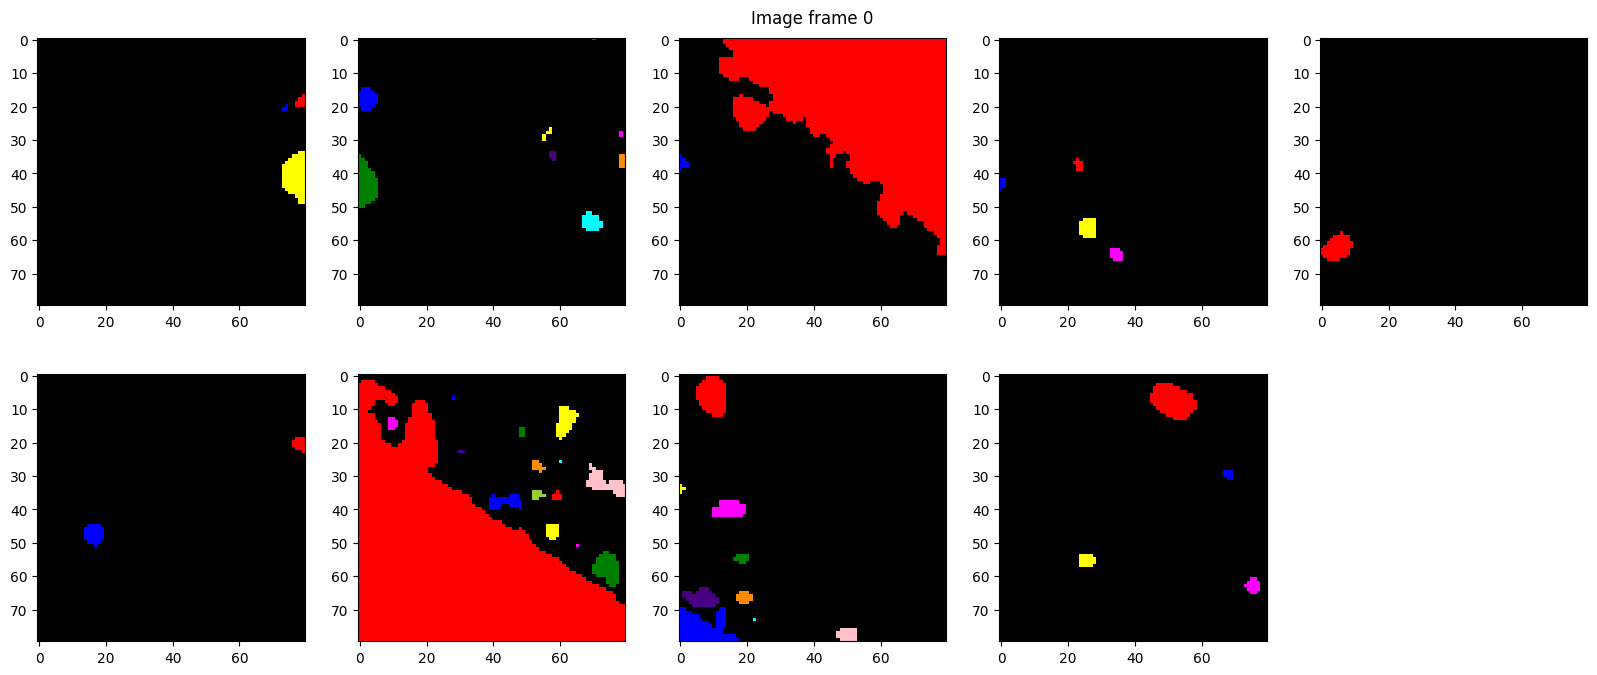

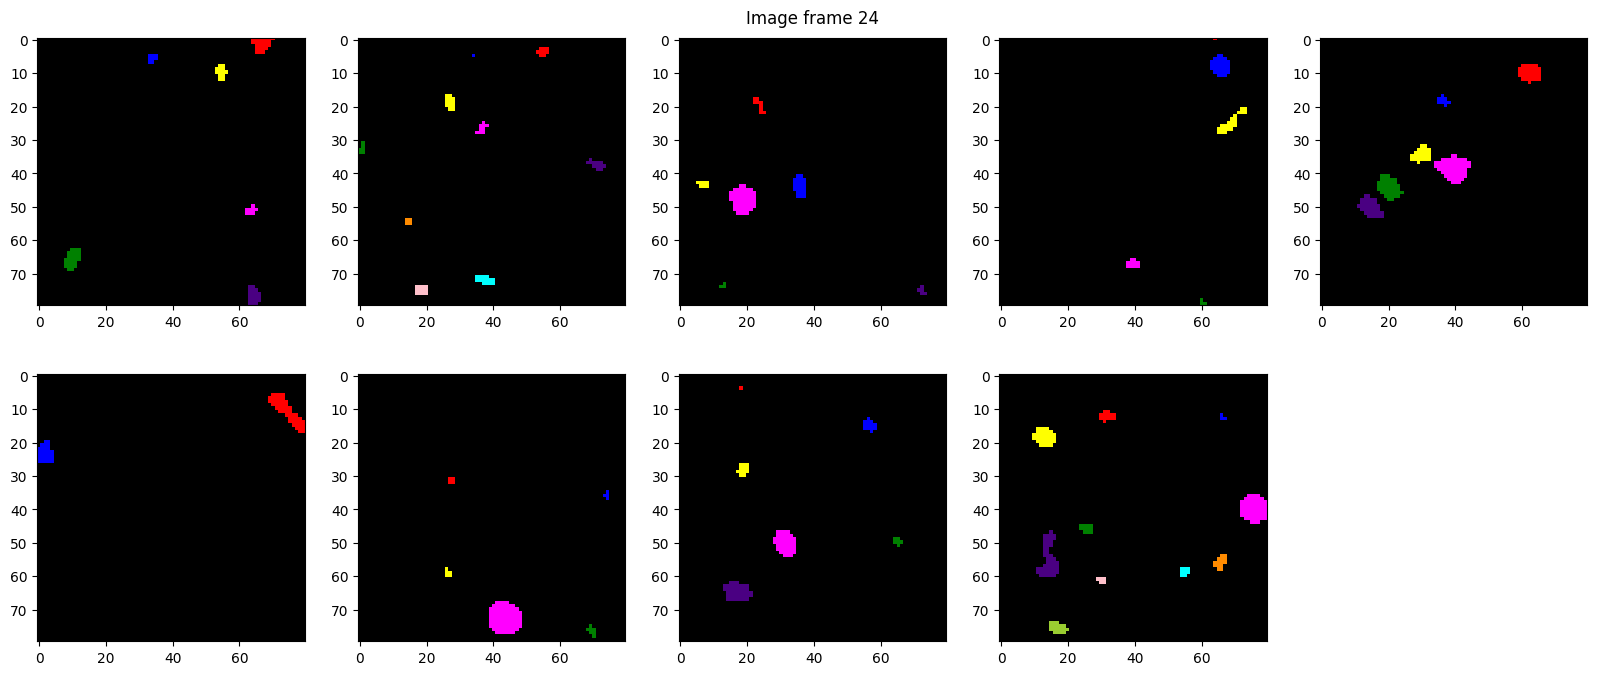

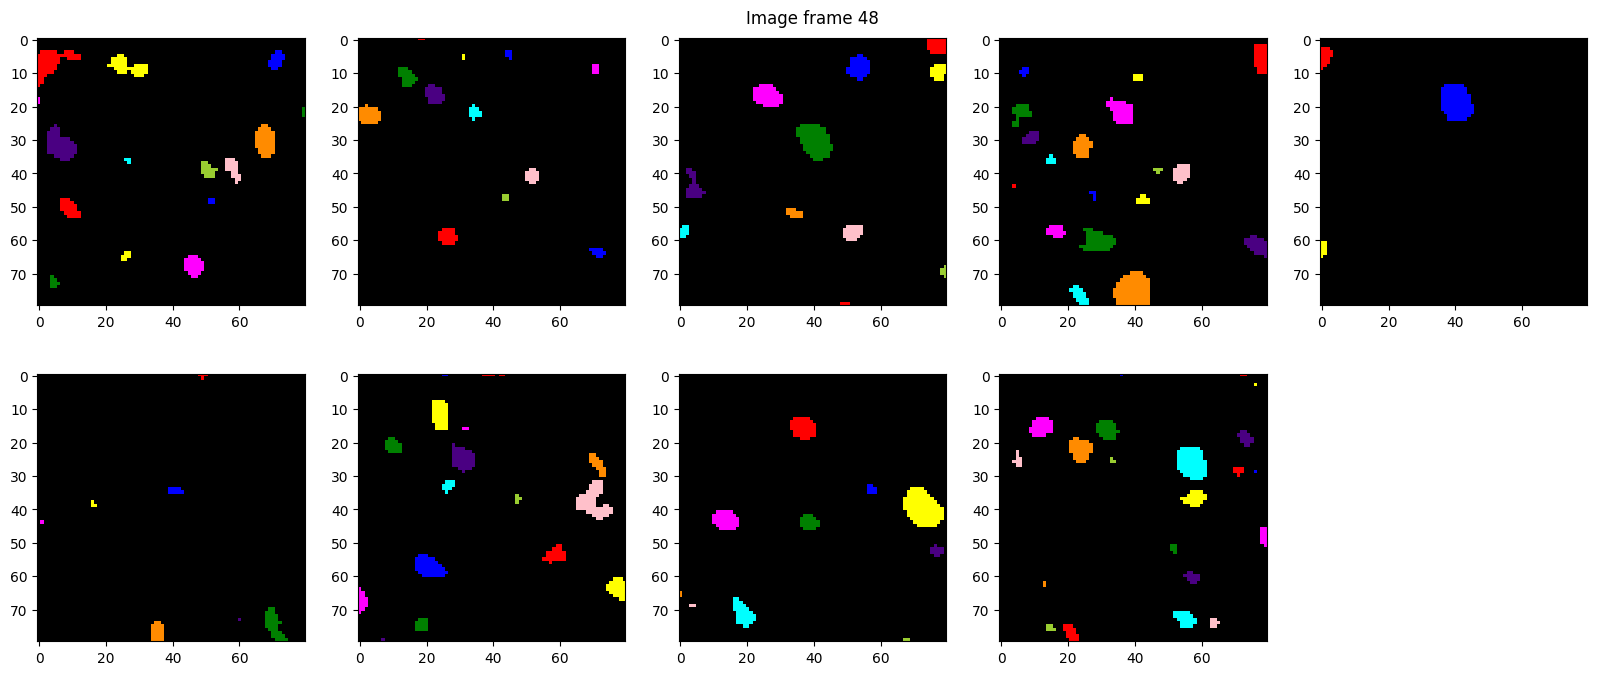

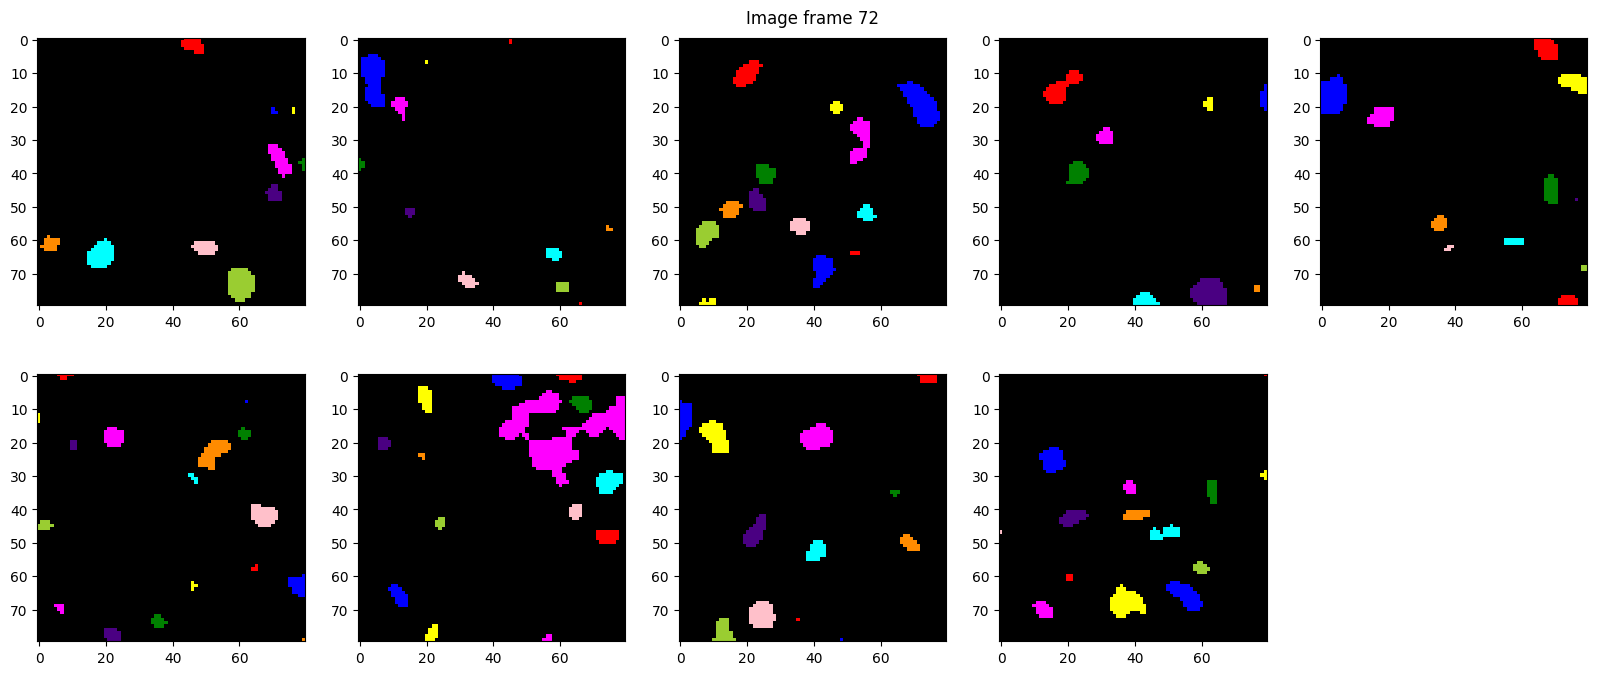

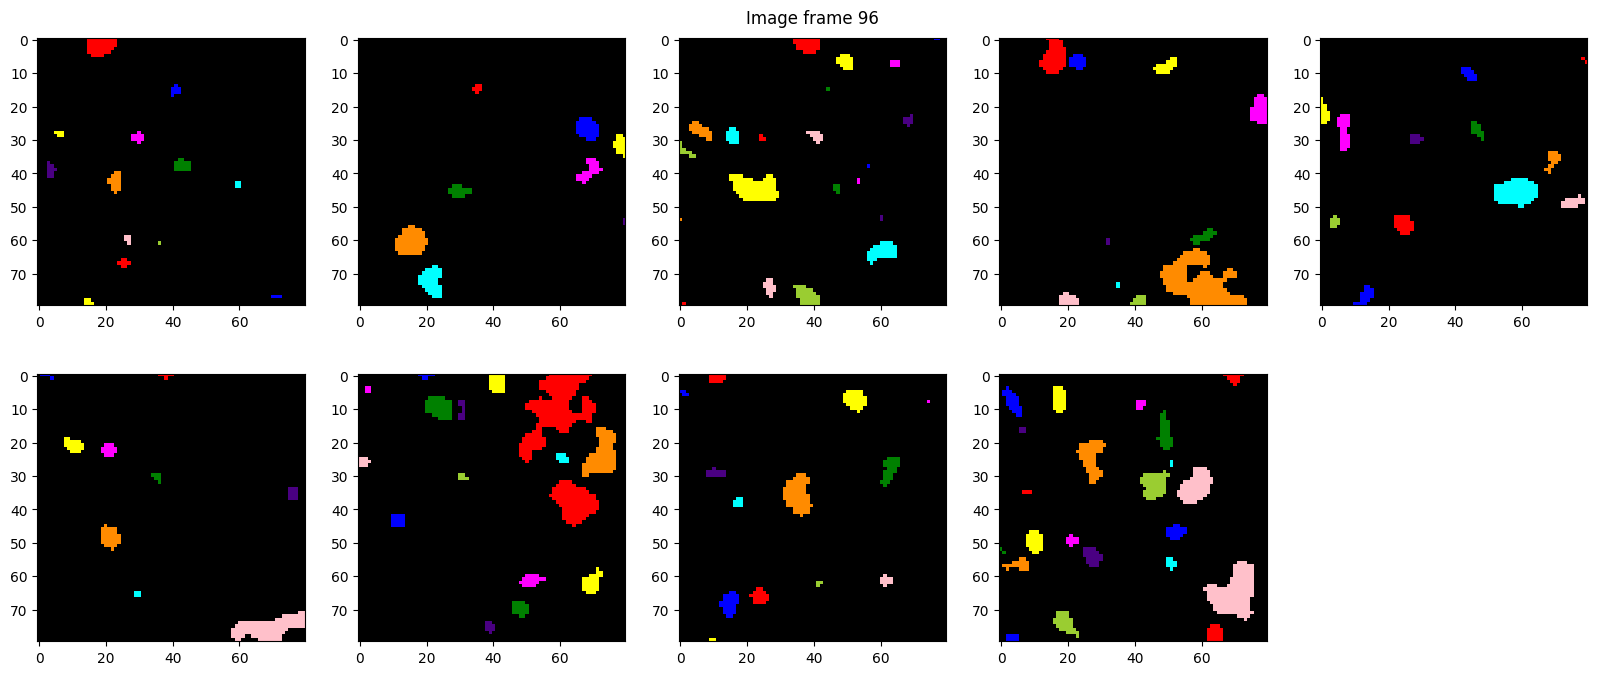

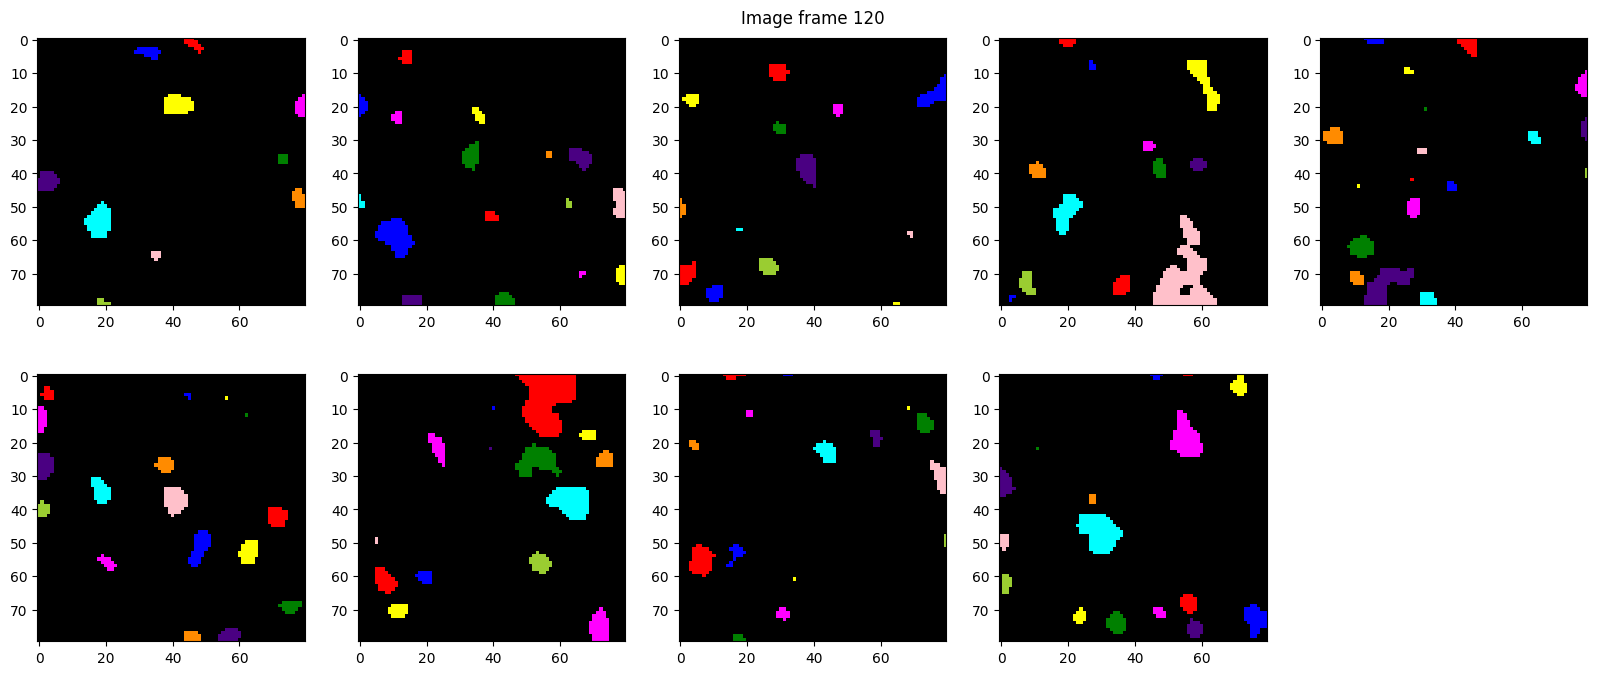

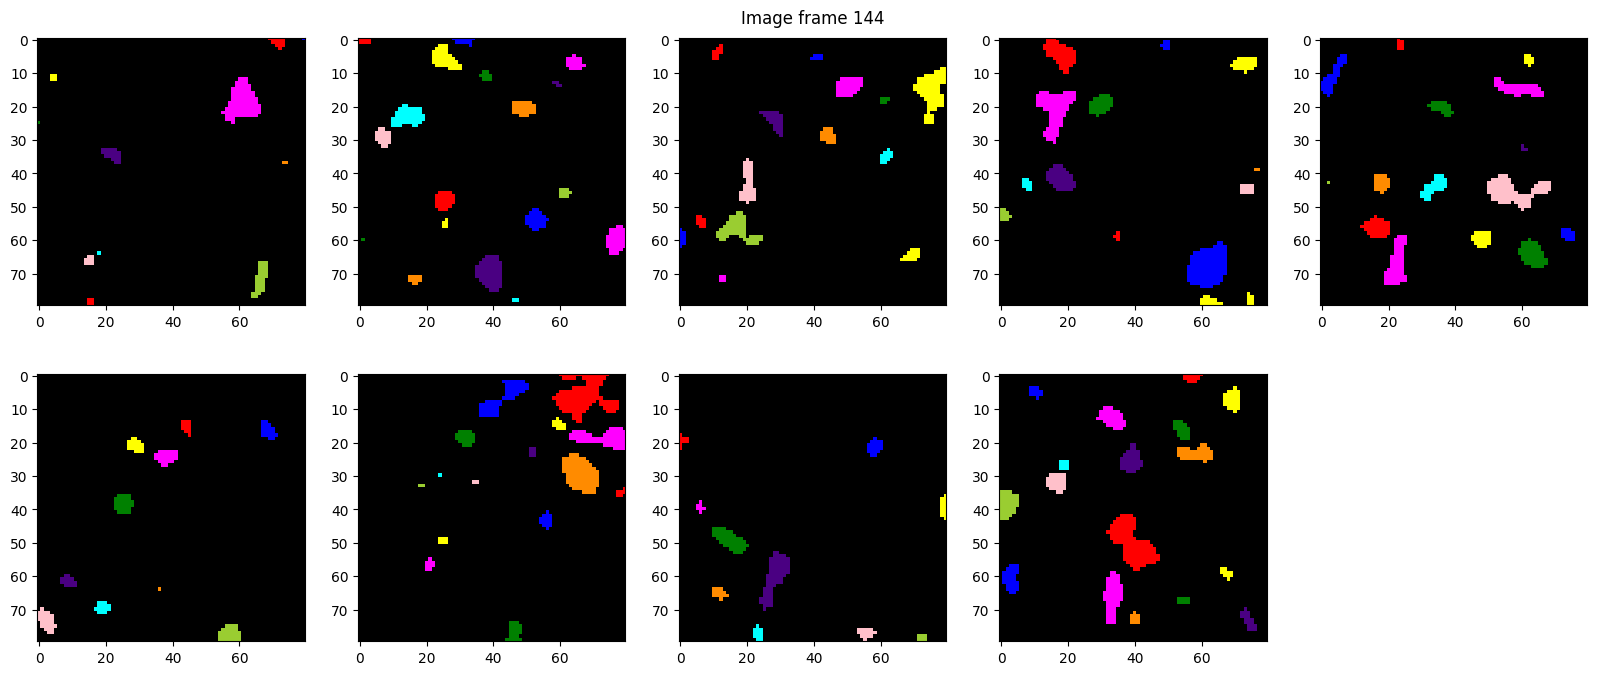

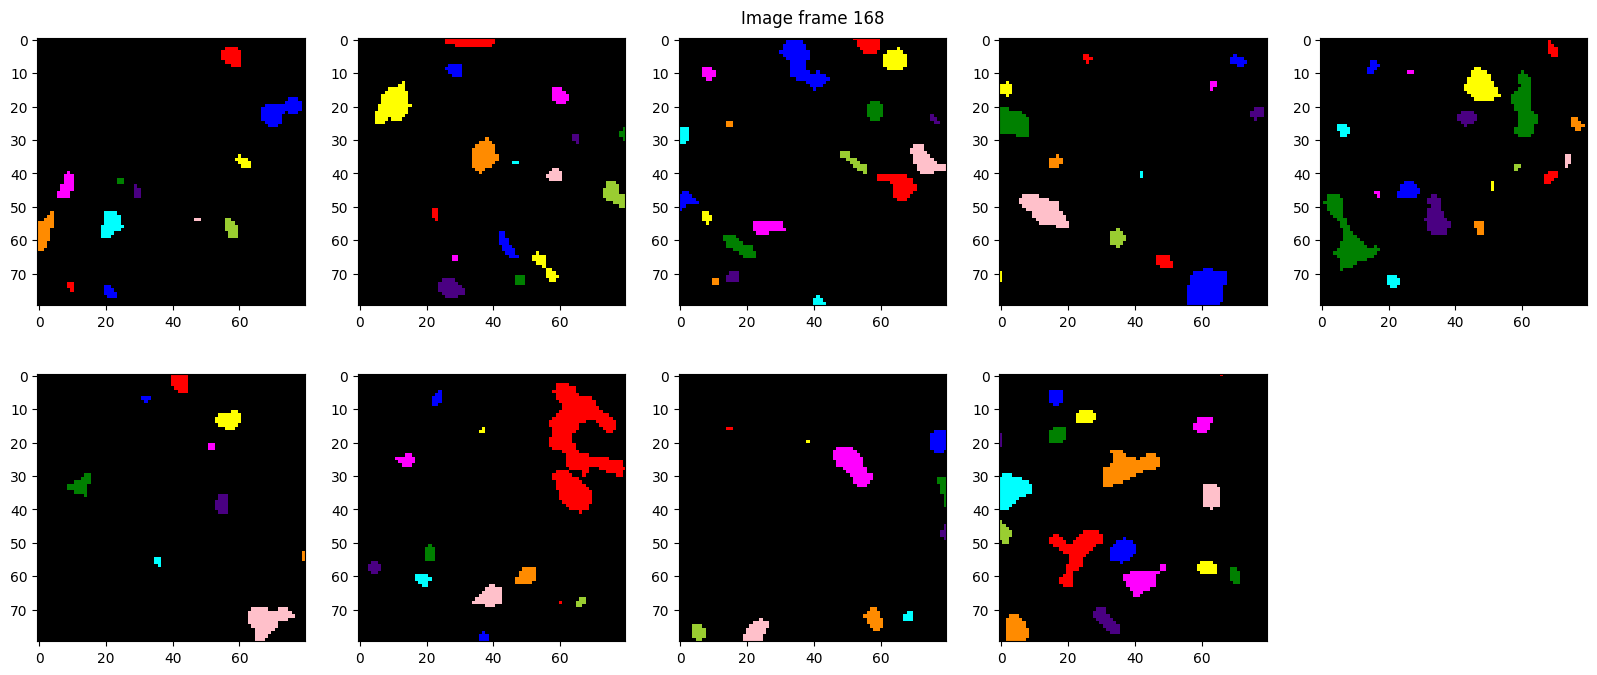

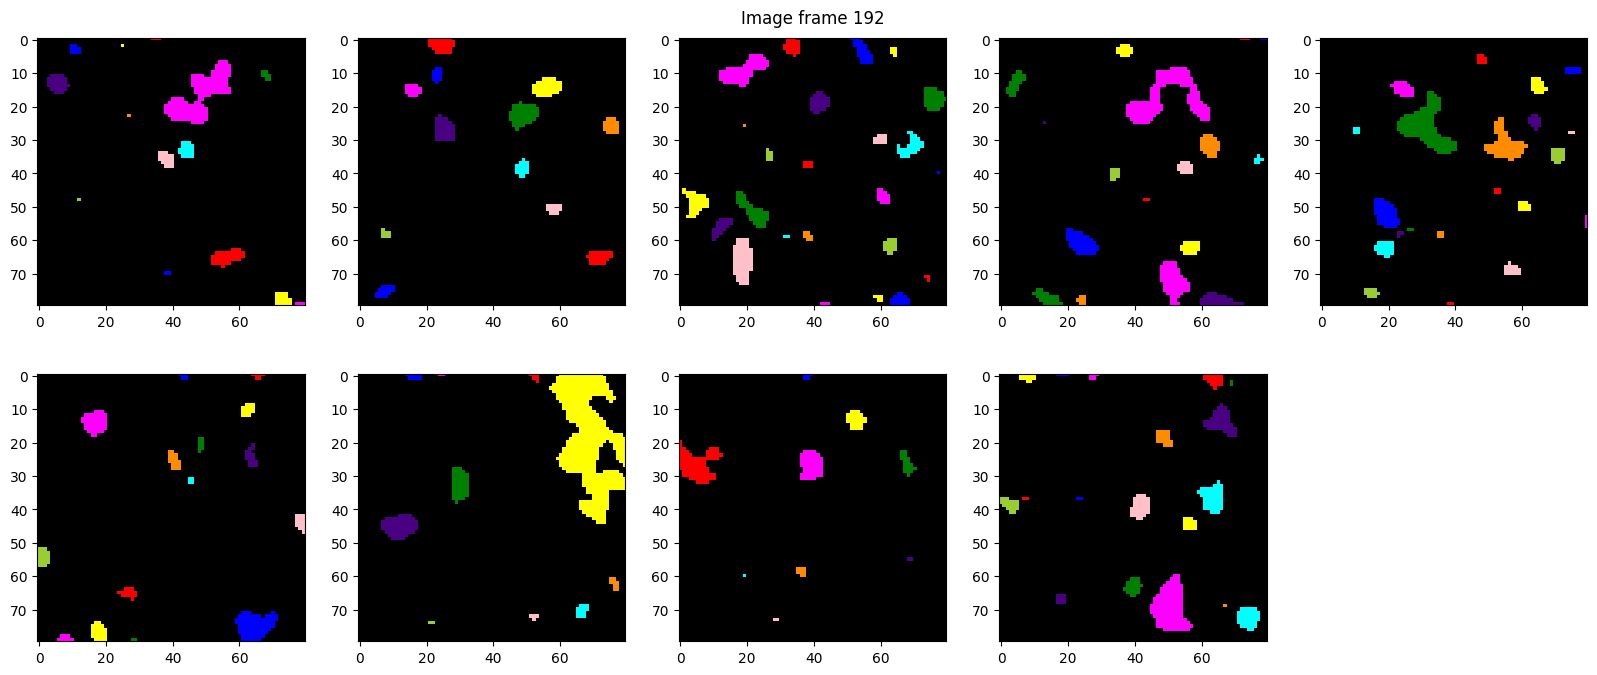

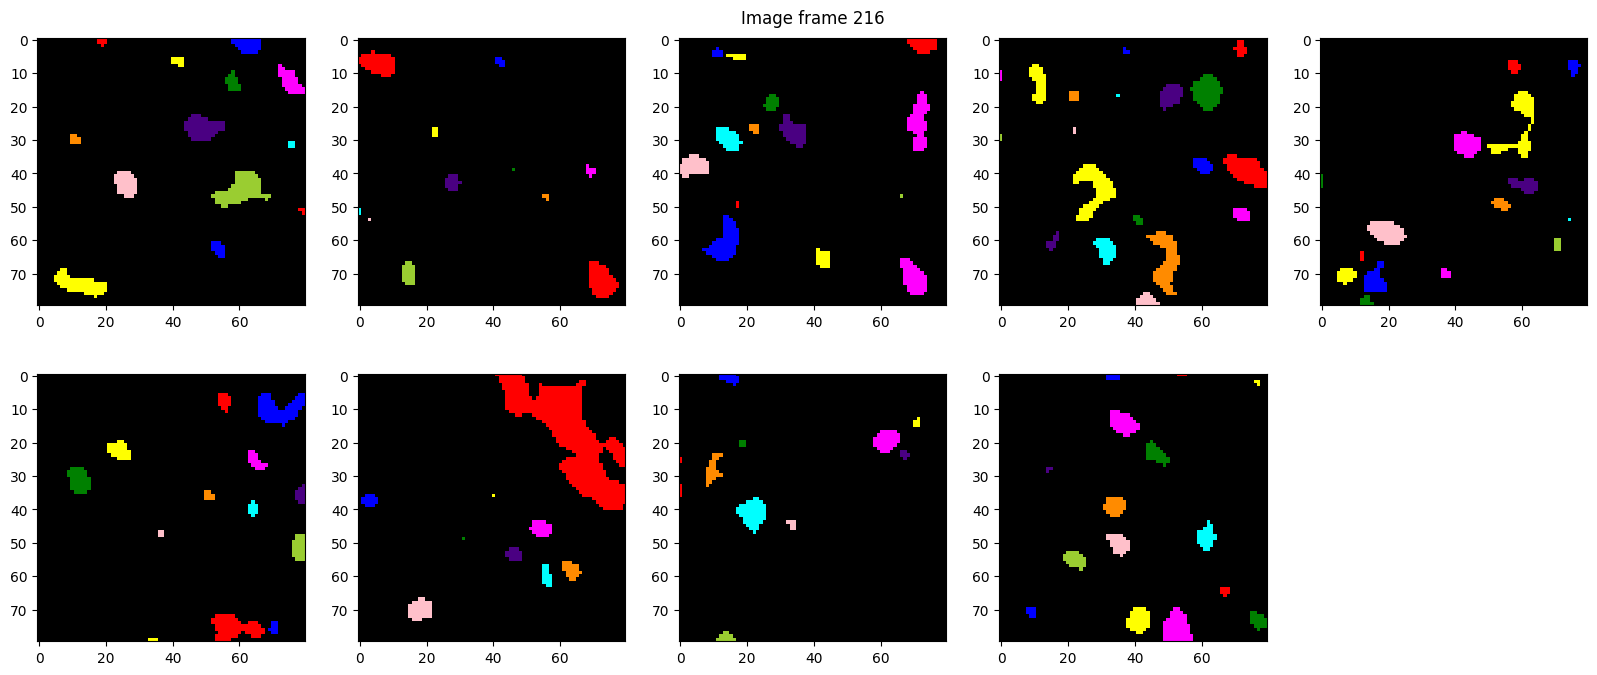

In [25]:
#display patches from image for each frame in the video
for f, img in enumerate(used_frame):
  patch_size = 80

  # List to store the patches
  patches = []

  # Iterate over the image in steps of patch_size
  for i in range(0, size, patch_size):
      for j in range(0, size, patch_size):
          # Extract the patch of size patch_size x patch_size
          patch = img[i:i+patch_size, j:j+patch_size]
          #patch = [row[j:j+patch_size] for row in img[i:i+patch_size]]
          
          # Add the patch to the list
          patches.append(patch)

  num_cols = 5
  num_rows = 2#int(np.ceil(len(patches)/2)) -2
  plt.figure(figsize=(4*num_cols,4*num_rows))
  plt.title(f"Image frame {(f)*skip_size*start_offset}")
  plt.axis("off")
  for i,p in enumerate(patches):
    
    plt.subplot(num_rows,num_cols,i + 1)
    plt.imshow(label2rgb(p, bg_label=0))
